### Librarie Alpha_Vantage  
https://gist.github.com/Duk2/9dfabfb01e16a96d03d431bb402f75c1  
Installation: https://pypi.org/project/alpha-vantage/

In [1]:
import pandas as pd
import numpy as np
import warnings
import time
from alpha_vantage.timeseries import TimeSeries

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
#Ocultamos la API KEY. Cada uno utilizará la que le proporcione el servivio de Alpha_Vantage
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

In [51]:
API_KEY = get_file_contents('API_Key_Alpha_Vantage.txt')
#print("Our API key is: %s" % (API_KEY))

In [52]:
ts = TimeSeries(key=API_KEY, output_format = 'pandas')

In [53]:
# Get json object with the intraday data and another with  the call's metadata
data, meta_data = ts.get_intraday('GOOGL')

In [55]:
print(data.head())
print()
print('Número de registros:',len(data))#POr defecto recupera los 100 últimos precios

                       1. open   2. high     3. low  4. close  5. volume
date                                                                    
2020-02-27 13:15:00  1359.7000  1365.500  1357.2301  1363.910    25407.0
2020-02-27 13:00:00  1363.7560  1368.110  1359.2500  1359.990    37881.0
2020-02-27 12:45:00  1357.6423  1369.400  1357.6423  1364.480    57941.0
2020-02-27 12:30:00  1360.1100  1360.760  1353.2400  1358.840    51182.0
2020-02-27 12:15:00  1352.5300  1359.355  1350.0100  1359.355    65421.0

Número de registros: 100


In [14]:
data, meta_data = ts.get_daily('GOOGL', outputsize='full')#Al añadir outputsize='full', recopila los datos desde el 2000
                                                          #get_daily recopila los datos por día

semanal = ts.get_weekly()   
mensual = ts.get_montly()    
diario = ts.get_daily()    
intradía = ts.get_intraday()  

In [17]:
print('Número de registros:',len(data))
data

Número de registros: 3908


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-02-27,1359.14,1359.14,1339.50,1353.550,469776.0
2020-02-26,1394.98,1413.67,1376.55,1390.470,2469137.0
2020-02-25,1431.00,1436.85,1380.42,1386.320,2578966.0
2020-02-24,1423.05,1436.38,1406.79,1419.860,2478039.0
2020-02-21,1504.58,1510.94,1478.49,1483.460,2126843.0
...,...,...,...,...,...
2004-08-25,104.76,108.00,103.88,106.000,9188600.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0


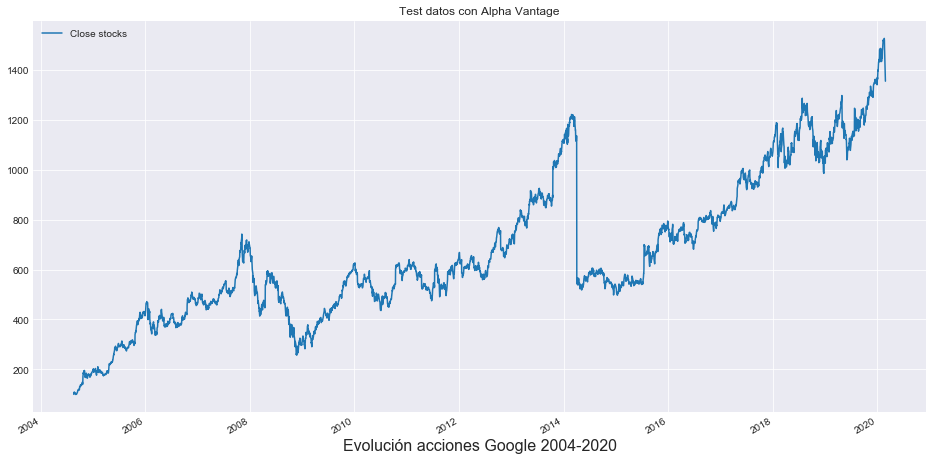

In [21]:
#Visualicemos la serie de tiempos de los precios
plt.rcParams['figure.figsize']= 16,8
plt.style.use('seaborn-darkgrid')
data['4. close'].plot(label='Close stocks')
plt.title('Test datos con Alpha Vantage')
plt.xlabel('Evolución acciones Google 2004-2020', fontsize=16)
plt.legend();

#### Datos ajustados  
Para acceder a datos ajustados hay que añadir "_adjusted" a la variable

In [22]:
#precio de cierre ajustado
##Definición cierre ajustado = https://www.rankia.mx/blog/como-comenzar-invertir-bolsa/4320061-analisis-bursatil-que-precio-cierre-ajustado
data_adjusted, meta_data = ts.get_daily_adjusted('GOOGL', outputsize='full')
data_adjusted.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-02-27,1359.14,1359.14,1337.77,1351.57,1351.57,747754.0,0.0,1.0
2020-02-26,1394.98,1413.67,1376.55,1390.47,1390.47,2469137.0,0.0,1.0
2020-02-25,1431.00,1436.85,1380.42,1386.32,1386.32,2578966.0,0.0,1.0
2020-02-24,1423.05,1436.38,1406.79,1419.86,1419.86,2478039.0,0.0,1.0
2020-02-21,1504.58,1510.94,1478.49,1483.46,1483.46,2126843.0,0.0,1.0


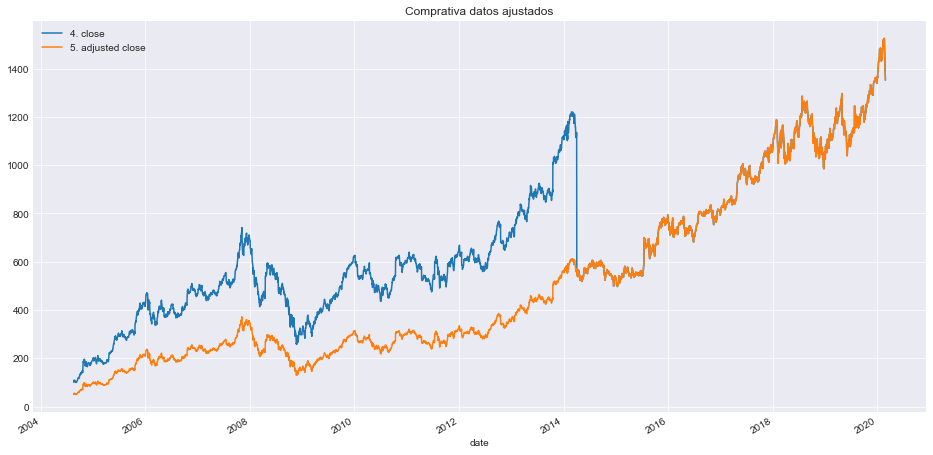

In [23]:
data_adjusted[['4. close','5. adjusted close']].plot()
plt.title('Comprativa datos ajustados');

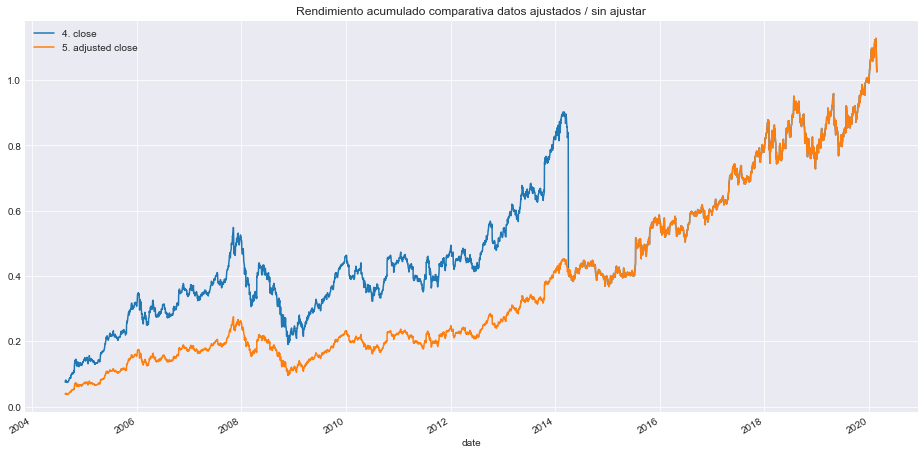

In [24]:
rendimiento = data_adjusted[['4. close','5. adjusted close']].pct_change()[1:]
RendAc = (1 + rendimiento).cumprod()
RendAc.plot(title= 'Rendimiento acumulado comparativa datos ajustados / sin ajustar');

In [25]:
rendimiento

,4. close,5. adjusted close
date,,
2020-02-26,0.028781,0.028781
2020-02-25,-0.002985,-0.002985
2020-02-24,0.024194,0.024194
2020-02-21,0.044793,0.044793
2020-02-20,0.022603,0.022603
...,...,...
2004-08-25,-0.017700,-0.017701
2004-08-24,-0.010660,-0.010659
2004-08-23,0.043196,0.043196


#### Rendimiento del Sector

In [26]:
from alpha_vantage.sectorperformance import SectorPerformances

sp = SectorPerformances(key=API_KEY, output_format='pandas')
data, meta_data = sp.get_sector()
data

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
Health Care,-0.0069,-0.0010,-0.0677,-0.0542,-0.0169,-0.0501,0.0542,0.3073,0.3499,2.1069
Utilities,-0.0088,-0.0097,-0.0411,-0.0191,0.0735,0.0373,0.1890,0.3067,0.4770,1.2977
Materials,-0.0134,-0.0034,-0.0760,-0.0646,-0.0620,-0.0902,-0.0011,0.0663,0.0778,0.8464
Industrials,-0.0139,-0.0079,-0.0819,-0.0768,-0.0596,-0.0541,0.0126,0.1510,0.3076,1.6006
Communication Services,-0.0148,-0.0021,-0.0772,-0.0552,0.0054,-0.0196,0.1533,0.0316,0.1287,0.7386
Consumer Staples,-0.0152,-0.0049,-0.0429,-0.0303,0.0072,-0.0206,0.1355,0.1163,0.2395,1.2656
Consumer Discretionary,-0.0160,-0.0069,-0.0823,-0.0290,0.0099,-0.0246,0.1045,0.3913,0.5907,3.0142
Financials,-0.0199,-0.0067,-0.0822,-0.0615,-0.0516,-0.0751,0.0751,0.1672,0.4341,1.4129
Information Technology,-0.0234,0.0040,-0.0988,-0.0511,0.0555,0.0077,0.3062,0.8279,1.2662,3.6020
Energy,-0.0242,-0.0297,-0.1283,-0.1647,-0.1821,-0.2136,-0.2586,-0.3051,-0.3918,-0.1405


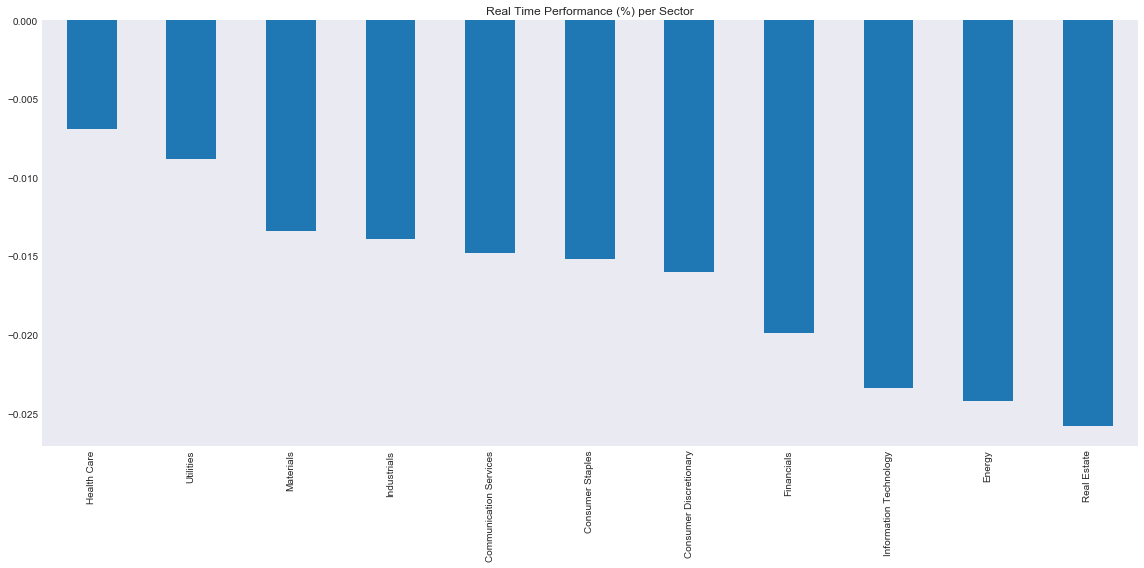

In [29]:
#Visualizamos estos datos
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

#### Datos de Criptomonedas

In [30]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

cc = CryptoCurrencies(key=API_KEY, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')
data.head()

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2020-02-27,61861.347400,8786.00,61907.254068,8792.52,61023.973163,8667.07,61076.920731,8674.59,2352.486936,2352.486936
2020-02-26,65596.404032,9316.48,66025.617296,9377.44,60788.525467,8633.63,61856.066725,8785.25,92130.345482,92130.345482
2020-02-25,67983.550768,9655.52,68120.707500,9675.00,65128.325000,9250.00,65591.897856,9315.84,54379.344552,54379.344552
2020-02-24,69961.198760,9936.40,70338.591000,9990.00,66702.388604,9473.56,67987.845717,9656.13,55796.596120,55796.596120
2020-02-23,67950.669765,9650.85,70338.591000,9990.00,67909.480500,9645.00,69961.198760,9936.40,37702.089843,37702.089843


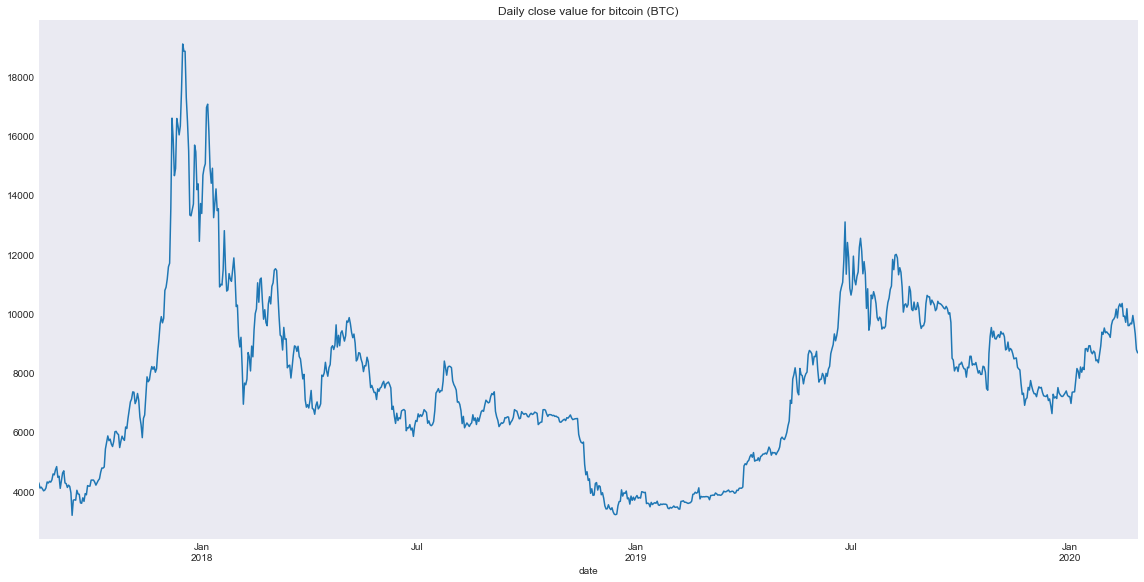

In [31]:
#Visualización de la serie temporal de precios en el mercado americano
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show();

### Librarie yfinance  
https://github.com/ranaroussi/yfinance  
Installation:  
Install yfinance using pip:   
$ pip install yfinance --upgrade --no-cache-dir  

Install yfinance using conda:  
$ conda install -c ranaroussi yfinance

In [32]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22414 sha256=e96d6a8e2c1d99ae64aa959b38c649ee6b5bf665278e4ad5ed1b74530fbe77af
  Stored in directory: C:\Users\JoseLuisFernandez\AppData\Local\Temp\pip-ephem-wheel-cache-_7f7936n\wheels\28\79\3c\08a301b673366fe664fe2853e136eb2acc1bb752045c11c6a1
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8372 sha256=03c5818ebb5674a0f8617daef9d83eefa2fe08c9c11d4270d042c1cbd74a894f
  Stored in directory: C:\Users\JoseLuisFernandez\AppData\Local\Temp\pip-ephem-wheel-cache-_7f7936n\wheels\ae\25\47\4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


In [33]:
#importamos la biblioteca recién instalada
import yfinance as yf

In [34]:
#Con el módulo .Ticker se puede llamar a los datos según los acrónimos de Yahoo finances
goog = yf.Ticker("GOOG")

In [35]:
goog.info #Produce un resumen en formato Json de todos los campos de la página de esa compañia en yahoo f.

{'zip': '94043',
 'sector': 'Communication Services',
 'fullTimeEmployees': 118899,
 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It offers performance and brand advertising services. The company operates through Google and Other Bets segments. The Google segment offers products, such as Ads, Android, Chrome, Google Cloud, Google Maps, Google Play, Hardware, Search, and YouTube, as well as technical infrastructure. It also offers digital content, cloud services, hardware devices, and other miscellaneous products and services. The Other Bets segment includes businesses, including Access, Calico, CapitalG, GV, Verily, Waymo, and X, as well as Internet and television services. Alphabet Inc. was founded in 1998 and is headquartered in Mountain View, California.',
 'city': 'Mountain View',
 'phone': '650-253-0000',
 'state': 'CA',
 'country': 'United States',
 'c

In [36]:
hist = goog.history(period="max")#Nos proporciona el histórico disponible de todas las acciones
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19,49.81,51.84,47.80,49.98,44871300,0,0.0
2004-08-20,50.32,54.34,50.06,53.95,22942800,0,0.0
2004-08-23,55.17,56.53,54.32,54.50,18342800,0,0.0
2004-08-24,55.41,55.59,51.59,52.24,15319700,0,0.0
2004-08-25,52.28,53.80,51.75,52.80,9232100,0,0.0
...,...,...,...,...,...,...,...
2020-02-21,1508.03,1512.21,1480.44,1485.11,1731700,0,0.0
2020-02-24,1426.11,1436.97,1411.39,1421.59,2867100,0,0.0
2020-02-25,1433.00,1438.14,1382.40,1388.45,2478300,0,0.0


In [37]:
#Se puede restringir por fechas
hist_date =  yf.download("GOOG", start="2017-01-01", end="2017-04-30")
hist_date

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1274600
...,...,...,...,...,...,...
2017-04-24,851.200012,863.450012,849.859985,862.760010,862.760010,1372500
2017-04-25,865.000000,875.000000,862.809998,872.299988,872.299988,1672000
2017-04-26,874.229980,876.049988,867.747986,871.729980,871.729980,1237200


In [38]:
#Se puede obtener információn más detallada de otros parámetros como
#Dividendos, desdoblamiento (split), acciones, financiación, etc
goog.actions

,Dividends,Stock Splits
Date,,
2014-03-27,0.0,2.002
2015-04-27,0.0,1.000


In [39]:
goog.dividends

Series([], Name: Dividends, dtype: int64)

In [40]:
goog.splits

Date
2014-03-27    2.002
2015-04-27    1.000
Name: Stock Splits, dtype: float64

In [41]:
goog.financials

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [43]:
#También se pueden obtener datos para múltiples Tickers/Acrónimos de Yahoo finances
data = yf.download("GOOG AAPL", start="2017-01-01", end="2017-04-30")
data

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        GOOG        AAPL        GOOG        AAPL   
Date                                                                     
2017-01-03  110.691154  786.140015  116.150002  786.140015  116.330002   
2017-01-04  110.567276  786.900024  116.019997  786.900024  116.510002   
2017-01-05  111.129562  794.020020  116.610001  794.020020  116.860001   
2017-01-06  112.368469  806.150024  117.910004  806.150024  118.160004   
2017-01-09  113.397697  806.650024  118.989998  806.650024  119.430000   
...                ...         ...         ...         ...         ...   
2017-04-24  137.482697  862.760010  143.639999  862.760010  143.949997   
2017-04-25  138.334549  872.299988  144.529999  872.299988  144.899994   
2017-04-26  137.520996  871.729980  143.679993  871.729980  144.600006   
2017-04-27  137.626251  874.250000  143.789993  874.250000  144.160004   
2017-04-28  137.492264  905.960022  143.649994  905.960022  144.300003   

                               Low                    Open              \
                  GOOG        AAPL        GOOG        AAPL        GOOG   
Date                                                                     
2017-01-03  789.630005  114.760002  775.799988  115.800003  778.809998   
2017-01-04  791.340027  115.750000  783.159973  115.849998  788.359985   
2017-01-05  794.479980  115.809998  785.020020  115.919998  786.080017   
2017-01-06  807.900024  116.470001  792.203979  116.779999  795.260010   
2017-01-09  809.966003  117.940002  802.830017  117.949997  806.400024   
...                ...         ...         ...         ...         ...   
2017-04-24  863.450012  143.179993  849.859985  143.500000  851.200012   
2017-04-25  875.000000  143.869995  862.809998  143.910004  865.000000   
2017-04-26  876.049988  143.380005  867.747986  144.470001  874.229980   
2017-04-27  875.400024  143.309998  870.380005  143.919998  873.599976   
2017-04-28  916.849976  143.270004  905.770020  144.089996  910.659973   

              Volume           
                AAPL     GOOG  
Date                           
2017-01-03  28781900  1657300  
2017-01-04  21118100  1073000  
2017-01-05  22193600  1335200  
2017-01-06  31751900  1640200  
2017-01-09  33561900  1274600  
...              ...      ...  
2017-04-24  17134300  1372500  
2017-04-25  18871500  1672000  
2017-04-26  20041200  1237200  
2017-04-27  14246300  2026800  
2017-04-28  20860400  3276300  

[81 rows x 12 columns]

Otras opciones de recopilación de datos:  
- show splits  
goog.splits  
- show financials  
goog.financials  
goog.quarterly_financials  
- show major holders  
stock.major_holders  
- show institutional holders  
stock.institutional_holders  
- show balance heet  
goog.balance_sheet  
goog.quarterly_balance_sheet  
- show cashflow  
goog.cashflow  
goog.quarterly_cashflow  
- show earnings  
goog.earnings  
goog.quarterly_earnings  
- show sustainability  
goog.sustainability  
- show analysts recommendations  
goog.recommendations  
- show next event (earnings, etc)  
goog.calendar  

### Librarie pandas_datareader   
https://github.com/ranaroussi/yfinance#pandas_datareader-override

In [45]:
from pandas_datareader import data as pdr

C:\Users\JoseLuisFernandez\Anaconda3\envs\Area_de_Trabajo\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [46]:
data = pdr.get_data_yahoo("GOOG", start="2017-01-01", end="2017-04-30")
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,789.630005,775.799988,778.809998,786.140015,1657300,786.140015
2017-01-04,791.340027,783.159973,788.359985,786.900024,1073000,786.900024
2017-01-05,794.479980,785.020020,786.080017,794.020020,1335200,794.020020
2017-01-06,807.900024,792.203979,795.260010,806.150024,1640200,806.150024
2017-01-09,809.966003,802.830017,806.400024,806.650024,1274600,806.650024
...,...,...,...,...,...,...
2017-04-24,863.450012,849.859985,851.200012,862.760010,1372500,862.760010
2017-04-25,875.000000,862.809998,865.000000,872.299988,1672000,872.299988
2017-04-26,876.049988,867.747986,874.229980,871.729980,1237200,871.729980
